Keaton Spiller
CS 445
January 2022
HW 1

For this homework you will implement a two-layer neural network (i.e, one hidden-layer) to perform the handwritten digit recognition task of Homework 1. Please write your own neural network code; don’t use code written by others, though you can refer to other code if you need help understanding the algorithm. You may use whatever programming language you prefer.
The dataset for this task is the MNIST dataset that you used in Homework 1. https://www.kaggle.com/oddrationale/mnist-in-csv
Neural network structure: Your neural network will have 784 inputs, one hidden layer with n hidden units (where n is a parameter of your program), and 10 output units. The hidden and output units should use the sigmoid activation function. The network should be fully connected —that is, every input unit connects to every hidden unit, and every hidden unit connects to every output unit. Every hidden and output unit also has a weighted connection from a bias unit, whose value is set to 1.
Task: Each output unit corresponds to one of the 10 classes (‘0’ to ‘9’). Set the target value tk for output unit k to 0.9 if the input class is the kth class, 0.1 otherwise.
Network classification: An example x is propagated forward from the input to the output. The class predicted by the network is the one corresponding to the most highly activated output unit. The activation function for each hidden and output unit is the sigmoid function.
Network training: Use back-propagation with stochastic gradient descent to train the network. Include the momentum term in the weight updates, as described in the lectures. Set the learning rate to 0.1 and the momentum to 0.9.

Preprocessing: Scale the data values to be between 0 and 1 by dividing by 255.
Initial weights: Your network should start off with small (−.05< w < .05) random positive
and negative weights.
Experiment 1: Vary number of hidden units.
Do experiments with n = 20, 50, and 100. (Remember to also include a bias unit with
weights to every hidden and output node.)
For each value of n, train your network on the training set, as described above, changing the
weights after each training example. After each epoch, calculate the network's accuracy on
the training set and the test set for your plot. Train your network for 50 epochs. In your
report, give a plot of both training and test accuracy as a function of epoch number (graph
both of these in the same plot).
After training is complete, create a confusion matrix for each of your trained networks,
summarizing results on the test set.
Discuss your results in a paragraph in your report. Include answers to the following
questions:

(1) How does the number of hidden units affect the final accuracy on the test data?
(2) How does it affect the number of epochs needed for training to converge?
(3) Is there evidence that any of your networks has overfit to the training data? If
so, what is that evidence?
(4) How do your results compare to the results obtained by your perceptron in HW
1?

Experiment 2: Vary the momentum value. Here, fix the number of hidden units to 100,
and vary the momentum value during training. Use momentum values of 0, 0.25, and 0.5.
Train networks using these values as in Experiment 1, and plot the results as in

Experiment 1. (Include your plot for n=100 and momentum = 0.9 that you completed in
Experiment 1.)
Create a confusion matrix for each of your trained networks, summarizing results on the test
set.
Discuss your results in a paragraph in your report. Include answers to the following
questions:

(1) How does the momentum value affect the final accuracy on the test data?
(2) How does it affect the number of epochs needed for training to converge?
(3) Again, is there evidence that any of your networks has overfit to the training data? If so, what is that evidence?

Experiment 3: Vary the number of training examples. In this experiment, fix the number of hidden units to 100 and momentum 0.9. Instead of using all of the training examples, train two networks, using respectively one quarter and one half of the training examples for training. Make sure that in each case your training data is approximately balanced among the 10 different classes. Plot the results, as in the previous experiments, plotting accuracy on both the training and test data at the end of each epoch.
Create a confusion matrix for each of your trained networks, summarizing results on the test set.
Discuss your results in a paragraph in your report. Include answers to the following questions:

(1) How does the size of the training data affect the final accuracy on the test data?
(2) How does it affect the number of epochs needed for training to converge?
(3) Again, is there evidence that any of your networks has overfit to the training data? If so, what is that evidence?

Report: Your report should include a short description of each experiment, along with the plots and discussion paragraphs requested above.
Here is what you need to turn in:
• Your report.
• Your well-commented code.
How to turn it in (read carefully!): • Send these items in electronic format to our TA by the due date. No hard copy please!
• The report should be in pdf format and the code should be in plain-text format.
• Put "MACHINE LEARNING PROGRAMMING #1" in the subject line.
If there are any questions, don’t hesitate to ask me or the grader

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
'''''
Training 60,000 images
'''''
def load_training():
    df = pd.read_csv('mnist_train.csv')
    true_basis = df['label'].to_numpy()
    del df['label']
    return true_basis,df
true_basis,df = load_training()
df

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
#################################################################
'''''
Now for the Test set of 10,000 images using the trained Weights
'''''
df2 = pd.read_csv('mnist_test.csv')
true_basis2 = df2['label'].to_numpy()
del df2['label']
df2

(60000,)
[8. 3. 9. ... 4. 5. 6.]
(15000,)


In [6]:
def Shape_Pictures(df):
    X = df.to_numpy()
    m = X.shape[0]
    inputs = X.shape[1]+1
    bias = np.ones((m, 1))
    X = np.concatenate((bias, X), axis=1)
    X = X / (255)

    print(str(m) +"  Pictures")
    print(str(inputs) + " for 28 x 28 pixels and 1 Bias")

    print(X.shape)
    return X, m, inputs, bias
X, m, inputs, bias = Shape_Pictures(df)

60000  Pictures
785 for 28 x 28 pixels and 1 Bias
(60000, 785)


In [51]:
true_basis,df = load_training()
X, m, inputs, bias = Shape_Pictures(df)
X2, m2, inputs2, bias2 = Shape_Pictures(df2)

# true_basis = true_basis[0:30000] # For quarter or half of the data
# X = X[0:30000,:]
# m = 30000

n =  100 # hidden nodes want to find [20, 50, 100]
eta = 0.1 # Learning Rate
momentum = 0.9
epoch = 50
hidden_bias = np.ones((1, 1))

weights_ij = np.random.rand(n,inputs)*(0.05 - (-0.05)) + -0.05
weights_kj = np.random.rand(10,n+1)*(0.05 - (-0.05)) + -0.05
Changed_weight_kj = np.zeros((10,n+1))
Changed_weight_ji = np.zeros((n,785))

h_j = np.zeros((n,1))
o_k = np.zeros((10,1))

h_j2 = np.zeros((n,1))
o_k2 = np.zeros((10,1))

train_correct_epoch = np.zeros((epoch,1)) 
test_correct_epoch = np.zeros((epoch,1)) 

def forward_pass(weights_ij, weights_kj, X, i, h_j, hidden_bias):
    h_j = np.dot(weights_ij, np.expand_dims(X[i], axis=1)) # Forward Pass hidden nodes
        
    e =  np.exp(-1.0 * h_j) 
    h_j = 1.0 / ( 1.0 + e)
        
    h_j = np.concatenate((hidden_bias, h_j), axis=0) # forward pass outputs # add to hidden bias weight 1 * random weight
    o_k = np.dot(weights_kj, h_j)
    e = np.exp(-1.0 * o_k)
    o_k = 1.0 / ( 1.0 + e)
    return o_k, h_j

def backwards_pass(true_basis, o_k, weights_kj, h_j , Changed_weight_kj, Changed_weight_ji, X, i, momentum, weights_ij, correct, train):
    tk = np.ones((10, 1)) * 0.1 # Backwards Pass
    label = int(true_basis[i]) # 0 1 2 3 4 5 6 7 8 9

    tk[label]=0.9 # say 4   [0000(0.9)000000] 0's replaced with 0.1
    delta_k = o_k*(1.0 - o_k)*(tk - o_k)
    w_trans =  np.transpose(weights_kj)
    
    weight_error = w_trans[1:n+1,:] # subset the hidden weight errors without the bias node 

    h_error = h_j[1:n+1,:] * ( 1.0 - h_j[1:n+1,:]) # hidden node error 
    
    delta_j = h_error * (np.dot(weight_error,delta_k)) # find error of hidden nodes without the bias node
    
    Changed_weight_kj = (eta * np.dot(delta_k, np.transpose(h_j))) + (momentum * (Changed_weight_kj) ) # changed weight of output to hidden /vice versa
    
    Changed_weight_ji = (eta * np.dot(delta_j, np.expand_dims(X[i], axis=0))) + (momentum * (Changed_weight_ji) )# changed weight of hidden to input /vice versa
    weights_ij = weights_ij + Changed_weight_ji
    weights_kj = weights_kj + Changed_weight_kj 

    if(label == np.argmax(o_k)): # most highly activated output unit is the prediction
        correct += 1
        
    return correct, o_k, weights_kj, h_j , Changed_weight_kj, Changed_weight_ji, weights_ij

for epoch in range(epoch):
    train_correct = 0
    test_correct = 0
    for i in range(0,m): # 0 to total number of training pictures
        
        o_k, h_j = forward_pass(
            weights_ij, weights_kj, X, i, h_j, hidden_bias)
        
        train_correct, o_k, weights_kj, h_j , Changed_weight_kj, Changed_weight_ji, weights_ij = backwards_pass(
            true_basis, o_k, weights_kj, h_j , Changed_weight_kj,
            Changed_weight_ji, X, i, momentum, weights_ij, train_correct, True)
    for i in range(0, m2):
        o_k2, h_j2 = forward_pass(
            weights_ij,weights_kj, X2, i, h_j2, hidden_bias)
        
        label2 = int(true_basis2[i]) # 0 1 2 3 4 5 6 7 8 9
        if(label2 == np.argmax(o_k2)): # most highly activated output unit is the prediction
            test_correct += 1
        
    X = np.append(X, np.expand_dims(true_basis,axis = 1), axis= 1) # Shuffle pictures randomly with the true labels associated with the pictures
    np.take(X,np.random.permutation(X.shape[0]),axis=0,out=X)   
    true_basis = X[:,785:]
    true_basis= true_basis.flatten()
    X= X[:,:785]
    
    train_correct_epoch[epoch] = train_correct/m
    test_correct_epoch[epoch] = test_correct/m2


60000  Pictures
785 for 28 x 28 pixels and 1 Bias
(60000, 785)
10000  Pictures
785 for 28 x 28 pixels and 1 Bias
(10000, 785)


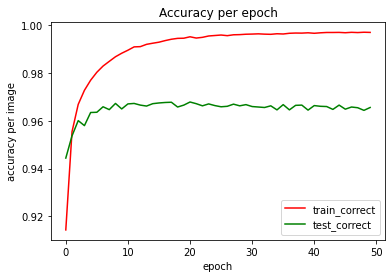

[0.99706667]
[0.9656]


In [52]:
plt.xlim=(0,epoch+1)
plt.ylim=(0,1)
epoch_axis = np.arange(epoch+1)
plt.title("Accuracy per epoch") 
plt.xlabel("epoch") 
plt.ylabel("accuracy per image") 
plt.plot(epoch_axis,train_correct_epoch,color='r', label='train_correct') 
plt.plot(epoch_axis,test_correct_epoch,color='g', label='test_correct')
plt.legend(['train_correct', 'test_correct'])
# plt.axhline(y = initial_correct_test, color = 'r', linestyle = '-')
plt.show()
print(train_correct_epoch[epoch])
print(test_correct_epoch[epoch])

In [53]:
confusion_correct =  0
confusion_matrix = np.zeros((10, 10))
for i in range(0, m2):
    o_k2, h_j2 = forward_pass(
        weights_ij,weights_kj, X2, i, h_j2, hidden_bias)
    
    label2 = int(true_basis2[i]) # 0 1 2 3 4 5 6 7 8 9
    if(label2 == np.argmax(o_k2)): # most highly activated output unit is the prediction
        test_correct += 1
        confusion_correct += 1
        confusion_matrix[label2][label2] += 1
    if(label2 != np.argmax(o_k2)):
            label2_false = np.argmax(o_k2)
            confusion_matrix[label2][label2_false] += 1
print("Accuracy " + str(confusion_correct/m2))
confusion_matrix = pd.DataFrame(confusion_matrix)

Accuracy 0.9656


In [55]:
confusion_matrix

,0,1,2,3,4,5,6,7,8,9
0,965.0,1.0,2.0,0.0,1.0,1.0,3.0,1.0,3.0,3.0
1,0.0,1116.0,4.0,3.0,0.0,2.0,3.0,1.0,6.0,0.0
2,2.0,0.0,999.0,4.0,0.0,2.0,4.0,8.0,11.0,2.0
3,2.0,0.0,5.0,977.0,1.0,8.0,0.0,3.0,12.0,2.0
4,0.0,2.0,2.0,0.0,946.0,0.0,8.0,3.0,3.0,18.0
5,4.0,0.0,2.0,18.0,1.0,839.0,10.0,3.0,11.0,4.0
6,7.0,3.0,1.0,1.0,2.0,6.0,931.0,0.0,7.0,0.0
7,1.0,1.0,14.0,7.0,1.0,0.0,0.0,991.0,6.0,7.0
8,6.0,2.0,4.0,3.0,2.0,6.0,4.0,3.0,939.0,5.0
9,4.0,4.0,1.0,9.0,10.0,2.0,2.0,8.0,16.0,953.0
